In [1]:
# Загрузка нужных библиотек
import numpy as np
import pandas as pd

from IPython.display import Image, display

from scipy.stats import shapiro
import scipy.stats as stats

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
# Загрузка данных
rate_2019 = pd.read_csv('data/rate_2019.csv')
rate_2020 = pd.read_csv('data/rate_2020.csv')
rate_2021 = pd.read_csv('data/rate_2021.csv')

## 2.3. Являются ли изменения в оценках компаний статистически значимыми?

Посмотрим на распределение оценок компаний по каждому году.

Видно, что распределения скошены вправо, значения распределены не нормально.

В 2019 и 2021 годах явно видны пиковые знаяения, встречающиеся наиболее часто. В 2020 году значения распределены более равномерно.

В 2020 и 2021 годах наиболее часто встречаются значения около 80, в 2019 - около 100.

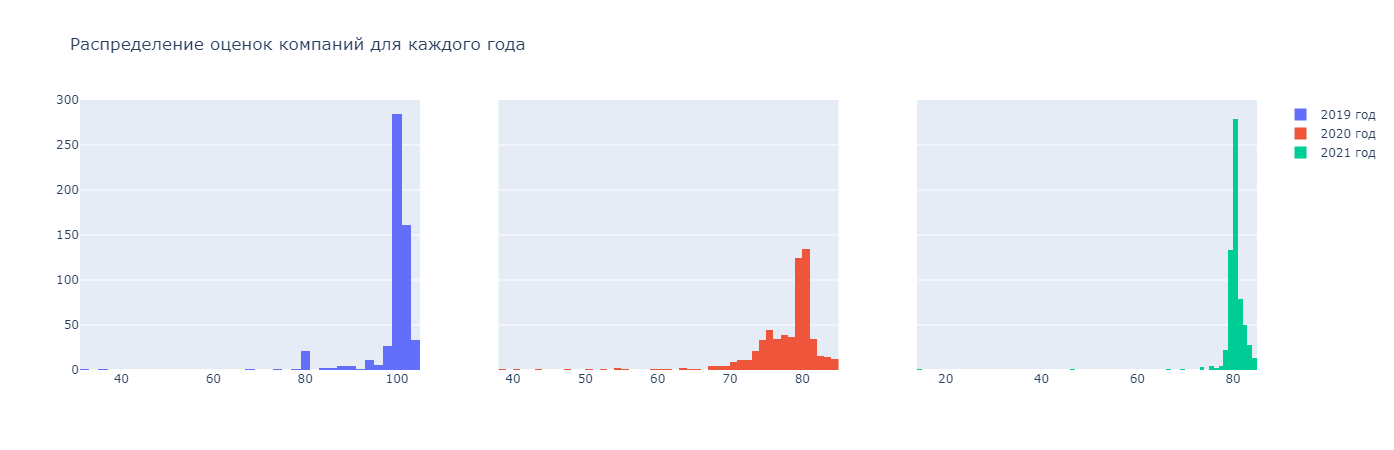

In [3]:
fig = make_subplots(rows=1, cols=3, shared_yaxes=True)

fig.append_trace(go.Histogram(x=rate_2019['points'], name='2019 год'), 1, 1)

fig.append_trace(go.Histogram(x=rate_2020['points'], name='2020 год'), 1, 2)

fig.append_trace(go.Histogram(x=rate_2021['points'], name='2021 год'), 1, 3)

fig.update_layout(title='Распределение оценок компаний для каждого года',
                  coloraxis=dict(colorscale='Bluered_r'),
                  showlegend=True)
fig.show()

display(Image(filename='img/rating_distribution.png', width=800))

In [4]:
def compare_test(groupA, groupB):
    '''
    Функция производит сравнение двух групп.
    1) Проверяется нормальность распределения каждой группы. Если обе группы распределены нормально, для сравнения используется Ttest, в противном случае используется критерий Манна-Уитни.
    2) Если группы рачпределены нормально, проверяется также гипотеза о гомогенности дисперсий двух групп.
    '''
    # Средние и медианы
    print(f'1 группа - среднее: {np.mean(groupA)}, медиана: {np.median(groupA)}')
    print(f'2 группа - среднее: {np.mean(groupB)}, медиана: {np.median(groupB)}')
    print('\n', '#########################################', '\n')
    
    # Проверка данных на нормальность распределения
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    # H0: Нормальное распределение
    # H1: Не нормальное распределение
    
    if (ntA == False) & (ntB == False): # H0: Нормальное распределение
        # Параметрический тест
        # Проверка гомогенности дисперсий
        print('Обе группы имеют нормальное распределение, используется T-test', '\n')
        print(f'p-value критерия Шапиро-Уилка для первой группы: {shapiro(groupA)[1]}')
        print(f'p-value критерия Шапиро-Уилка для второй группы: {shapiro(groupB)[1]}')
        print('\n', '#########################################', '\n')
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Дисперсии гомогенны
        # H1: Дисперсии гетерогенны
        
        if leveneTest == False:
            # Дисперсии гомогенны, equal_var=True
            print('Дисперсии групп гомогенны', '\n')
            print(f'p-value теста Левена: {stats.levene(groupA, groupB)[1]}')
            print('\n', '#########################################', '\n')
            test_result = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: Средние равны
            # H1: Средние не равны
        else:
            # Дисперсии гетерогенны, equal_var=False
            print('Дисперсии групп гетерогенны', '\n')
            print(f'p-value теста Левена: {stats.levene(groupA, groupB)[1]}')
            print('\n', '#########################################', '\n')
            test_result = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: Средние равны
            # H1: Средние не равны
    else: # H1: Не нормальное распределение
        # Непараметрический тест
        print('Какая-то из групп (либо обе группы) имеет не нормальное распределение, используется критерий Манна-Уитни', '\n')
        print(f'p-value критерия Шапиро-Уилка для первой группы: {shapiro(groupA)[1]}')
        print(f'p-value критерия Шапиро-Уилка для второй группы: {shapiro(groupB)[1]}')
        print('\n', '#########################################', '\n')
        test_result = stats.mannwhitneyu(groupA, groupB)[1]
        # H0: Средние равны
        # H1: Средние не равны
    
    # Print Hypothesis
    print('Тестируемые гипотезы', '\n')
    print('H0: Группы принадлежат одному распределению, различия НЕ ЗНАЧИМЫ')
    print('H1: Группы принадлежат разным распределениям, различия ЗНАЧИМЫ')
    print('\n', '#########################################', '\n')

    if test_result < 0.05:
        print('Есть основания отклонить нулевую гипотезу, различия между группами значимы')
        print(f'Полученное значение p-value: {test_result}')
    else:
        print('Нет оснований отклонить нулевую гипотезу, различия между группами не значимы')
        print(f'Полученное значение p-value: {test_result}')

In [5]:
# Сравнение оценок в 2019 и 2020
compare_test(rate_2019['points'], rate_2020['points'])

1 группа - среднее: 99.15110320284697, медиана: 100.43
2 группа - среднее: 77.66434710743802, медиана: 79.51

 ######################################### 

Какая-то из групп (либо обе группы) имеет не нормальное распределение, используется критерий Манна-Уитни 

p-value критерия Шапиро-Уилка для первой группы: 3.822173844020971e-38
p-value критерия Шапиро-Уилка для второй группы: 5.834929673159698e-31

 ######################################### 

Тестируемые гипотезы 

H0: Группы принадлежат одному распределению, различия НЕ ЗНАЧИМЫ
H1: Группы принадлежат разным распределениям, различия ЗНАЧИМЫ

 ######################################### 

Есть основания отклонить нулевую гипотезу, различия между группами значимы
Полученное значение p-value: 2.8396651559288137e-177


In [6]:
# Сравнение оценок в 2020 и 2021
compare_test(rate_2020['points'], rate_2021['points'])

1 группа - среднее: 77.66434710743802, медиана: 79.51
2 группа - среднее: 80.38958199356914, медиана: 80.4

 ######################################### 

Какая-то из групп (либо обе группы) имеет не нормальное распределение, используется критерий Манна-Уитни 

p-value критерия Шапиро-Уилка для первой группы: 5.834929673159698e-31
p-value критерия Шапиро-Уилка для второй группы: 8.758115402030107e-43

 ######################################### 

Тестируемые гипотезы 

H0: Группы принадлежат одному распределению, различия НЕ ЗНАЧИМЫ
H1: Группы принадлежат разным распределениям, различия ЗНАЧИМЫ

 ######################################### 

Есть основания отклонить нулевую гипотезу, различия между группами значимы
Полученное значение p-value: 1.1307682922647809e-46


In [7]:
# Сравнение оценок в 2019 и 2021
compare_test(rate_2019['points'], rate_2021['points'])

1 группа - среднее: 99.15110320284697, медиана: 100.43
2 группа - среднее: 80.38958199356914, медиана: 80.4

 ######################################### 

Какая-то из групп (либо обе группы) имеет не нормальное распределение, используется критерий Манна-Уитни 

p-value критерия Шапиро-Уилка для первой группы: 3.822173844020971e-38
p-value критерия Шапиро-Уилка для второй группы: 8.758115402030107e-43

 ######################################### 

Тестируемые гипотезы 

H0: Группы принадлежат одному распределению, различия НЕ ЗНАЧИМЫ
H1: Группы принадлежат разным распределениям, различия ЗНАЧИМЫ

 ######################################### 

Есть основания отклонить нулевую гипотезу, различия между группами значимы
Полученное значение p-value: 5.662891214952993e-170
